In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns

In [6]:
men_app = pd.read_csv('men_app.csv')
women_app = pd.read_csv('women_app.csv')

target1 = pd.read_csv('target1_app.csv')
target0 = pd.read_csv('target0_app.csv')

app = pd.read_csv('app_clean.csv')

print(men_app.shape)
print(women_app.shape)
print(target1.shape)
print(target0.shape)
print(app.shape)

(87480, 72)
(146899, 72)
(21019, 72)
(213360, 72)
(234379, 72)


In [132]:
palette_gender = ['#225ea8','#cb181d']

## Type of loan and default rates

Cash loans         19576
Revolving loans     1443
Name: credit_type, dtype: int64
Cash loans         190080
Revolving loans     23280
Name: credit_type, dtype: int64


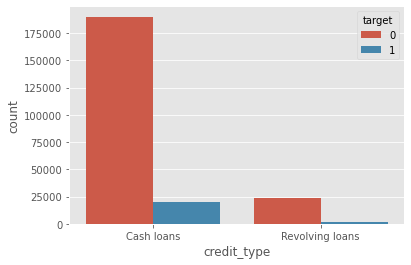

In [40]:
sns.countplot(x = 'credit_type', hue ='target', data = app)

tt = target1['credit_type'].value_counts()
print(tt)

tttt = target0['credit_type'].value_counts()
print(tttt)

### Percentage of defaults per Loan Type

Cash loans         19576
Revolving loans     1443
Name: credit_type, dtype: int64
Cash loans         209656
Revolving loans     24723
Name: credit_type, dtype: int64
9.34 of Cash loans default, while 5.84 of Revolving loans fall into default


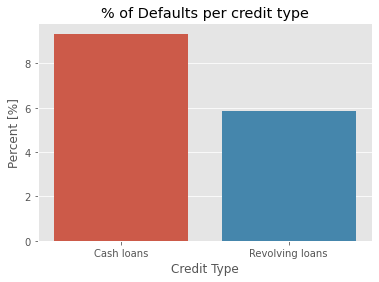

In [57]:
targ1_type = target1['credit_type'].value_counts()
print(targ1_type)
targ1_total = app['credit_type'].value_counts()
print(targ1_total) 

targ1_type_perc = (targ1_type/targ1_total)*100
targ1_type_perc = targ1_type_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_type_perc.index, y = targ1_type_perc.values)
ax.set(xlabel = 'Credit Type', ylabel ='Percent [%]', title = '% of Defaults per credit type')

print(f'{round(targ1_type_perc.values[0],2)} of Cash loans default, while {round(targ1_type_perc.values[1],2)} of Revolving loans fall into default')

## Age and default rates

<AxesSubplot:xlabel='age_range', ylabel='count'>

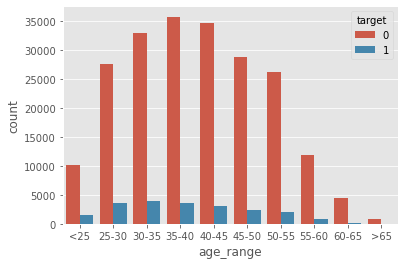

In [14]:
sns.countplot(x = 'age_range', hue = 'target', data = app, \
              order = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','>65'])

#### A little hard to see, so plot percentage per age rage that defaults

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Percent [%]'),
 Text(0.5, 1.0, 'Defaults %')]

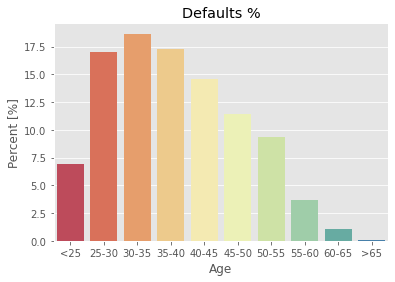

In [26]:
# Percentage of defaults (defaults per age group compared to total defaults)

targ1_age = target1['age_range'].value_counts()
targ1_total = target1.shape[0]
targ1_age_perc = (targ1_age/targ1_total)*100
targ1_age_perc = targ1_age_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_age_perc.index, y = targ1_age_perc.values,\
                order = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','>65'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = 'Defaults % per total defaults')


[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Percent [%]'),
 Text(0.5, 1.0, 'Defaults in age group')]

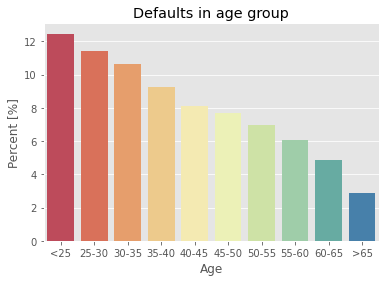

In [28]:
# Number of defaults per age range
targ1_age = target1['age_range'].value_counts()
age_total = app['age_range'].value_counts()
targ1_age_perc = (targ1_age/age_total)*100
targ1_age_perc = targ1_age_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_age_perc.index, y = targ1_age_perc.values,\
                order = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','>65'],\
                 palette = 'Spectral')

ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = 'Defaults per age group')

## Gender and defaults

<AxesSubplot:xlabel='gender', ylabel='count'>

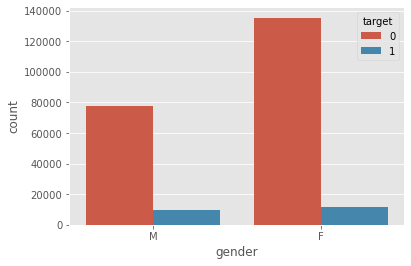

In [43]:
sns.countplot(x = 'gender', hue ='target', data = app)

## Gender percentage of total defaults 

10.91 of Male customers default, while 7.81 of females fall into default


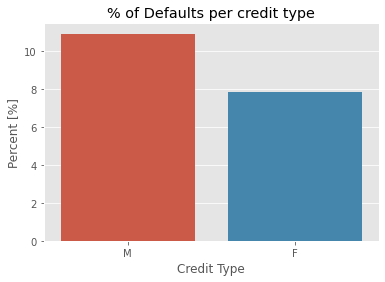

In [60]:
targ1_gen = target1['gender'].value_counts()
targ1_total = app['gender'].value_counts()
 

targ1_gen_perc = (targ1_gen/targ1_total)*100
targ1_gen_perc = targ1_gen_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_gen_perc.index, y = targ1_gen_perc.values)
ax.set(xlabel = 'Credit Type', ylabel ='Percent [%]', \
       title = '% of Defaults per credit type')

print(f'{round(targ1_gen_perc.values[0],2)} of Male customers default, while {round(targ1_gen_perc.values[1],2)} of females fall into default')

## By Income 

In [67]:
print(target1['income_range'].value_counts())

110000-150000    6481
150000-200000    4742
200000-300000    4238
70000-90000      2532
50000-70000      1029
>300000          1005
90000-110000      804
30000-50000       185
<30000              3
Name: income_range, dtype: int64


[Text(0, 0, '<30000'),
 Text(1, 0, '30000-50000'),
 Text(2, 0, '50000-70000'),
 Text(3, 0, '70000-90000'),
 Text(4, 0, '90000-110000'),
 Text(5, 0, '110000-150000'),
 Text(6, 0, '150000-200000'),
 Text(7, 0, '200000-300000'),
 Text(8, 0, '>300000')]

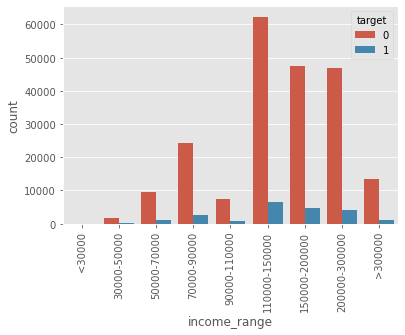

In [77]:
ax = sns.countplot(x = 'income_range', hue = 'target', data = app,\
                       order = ['<30000','30000-50000','50000-70000','70000-90000','90000-110000',\
                                '110000-150000','150000-200000','200000-300000','>300000'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '<30000'),
 Text(1, 0, '30000-50000'),
 Text(2, 0, '50000-70000'),
 Text(3, 0, '70000-90000'),
 Text(4, 0, '90000-110000'),
 Text(5, 0, '110000-150000'),
 Text(6, 0, '150000-200000'),
 Text(7, 0, '200000-300000'),
 Text(8, 0, '>300000')]

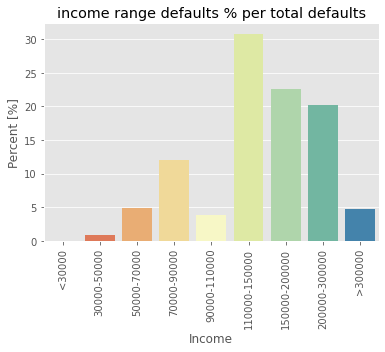

In [95]:
# Percentage of defaults (defaults per income group compared to total defaults)

targ1_in = target1['income_range'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['<30000','30000-50000','50000-70000','70000-90000','90000-110000',\
                                '110000-150000','150000-200000','200000-300000','>300000'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Income', ylabel ='Percent [%]', title = 'income range defaults % per total defaults')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

78.32289422121767
110000-150000    68833
150000-200000    52122
200000-300000    51102
70000-90000      26868
>300000          14580
50000-70000      10515
90000-110000      8377
30000-50000       1934
<30000              48
Name: income_range, dtype: int64
234379
(234379, 72)


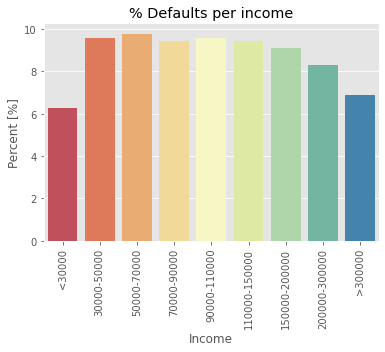

In [87]:

targ1_in = target1['income_range'].value_counts()
targ1_total = app['income_range'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['<30000','30000-50000','50000-70000','70000-90000','90000-110000',\
                                '110000-150000','150000-200000','200000-300000','>300000'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Income', ylabel ='Percent [%]', title = '% Defaults per income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#print(targ1_in_perc.values.sum())
#print(targ1_total)
#print(targ1_total.sum())
#print(app.shape)

## By loan amount

>300000          15131
200000-300000     3718
150000-200000     1255
110000-150000      563
90000-110000       153
70000-90000        113
50000-70000         66
30000-50000         20
Name: credit_range, dtype: int64


[Text(0, 0, '<30000'),
 Text(1, 0, '30000-50000'),
 Text(2, 0, '50000-70000'),
 Text(3, 0, '70000-90000'),
 Text(4, 0, '90000-110000'),
 Text(5, 0, '110000-150000'),
 Text(6, 0, '150000-200000'),
 Text(7, 0, '200000-300000'),
 Text(8, 0, '>300000')]

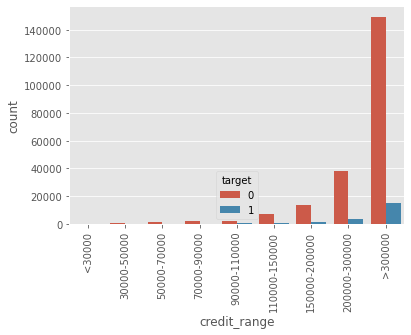

In [93]:
print(target1['credit_range'].value_counts())
ax = sns.countplot(x = 'credit_range', hue = 'target', data = app, \
                   order = ['<30000','30000-50000','50000-70000','70000-90000','90000-110000',\
                               '110000-150000','150000-200000','200000-300000','>300000'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '<30000'),
 Text(1, 0, '30000-50000'),
 Text(2, 0, '50000-70000'),
 Text(3, 0, '70000-90000'),
 Text(4, 0, '90000-110000'),
 Text(5, 0, '110000-150000'),
 Text(6, 0, '150000-200000'),
 Text(7, 0, '200000-300000'),
 Text(8, 0, '>300000')]

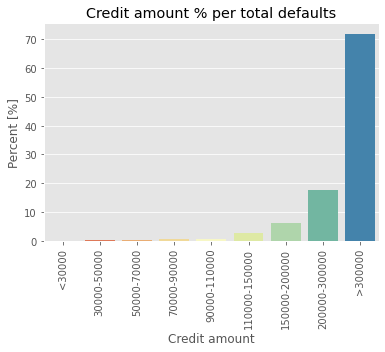

In [96]:
# Percentage of defaults (defaults per credit amount compared to total defaults)

targ1_in = target1['credit_range'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['<30000','30000-50000','50000-70000','70000-90000','90000-110000',\
                                '110000-150000','150000-200000','200000-300000','>300000'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Credit amount', ylabel ='Percent [%]', title = 'Credit amount % per total defaults')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '<30000'),
 Text(1, 0, '30000-50000'),
 Text(2, 0, '50000-70000'),
 Text(3, 0, '70000-90000'),
 Text(4, 0, '90000-110000'),
 Text(5, 0, '110000-150000'),
 Text(6, 0, '150000-200000'),
 Text(7, 0, '200000-300000'),
 Text(8, 0, '>300000')]

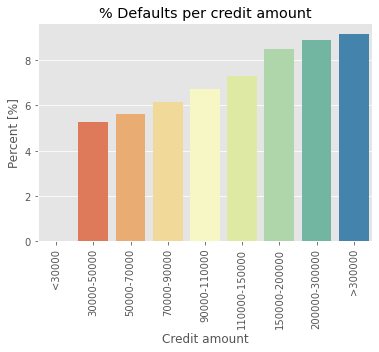

In [98]:
# Percentage of defaults per credit range
targ1_in = target1['credit_range'].value_counts()
targ1_total = app['credit_range'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['<30000','30000-50000','50000-70000','70000-90000','90000-110000',\
                                '110000-150000','150000-200000','200000-300000','>300000'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Credit amount', ylabel ='Percent [%]', title = '% Defaults per credit amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#print(targ1_in_perc.values.sum())
#print(targ1_total)
#print(targ1_total.sum())
#print(app.shape)

## By education 

Secondary / secondary special    16526
Higher education                  3375
Incomplete higher                  804
Lower secondary                    312
Academic degree                      2
Name: education, dtype: int64


[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

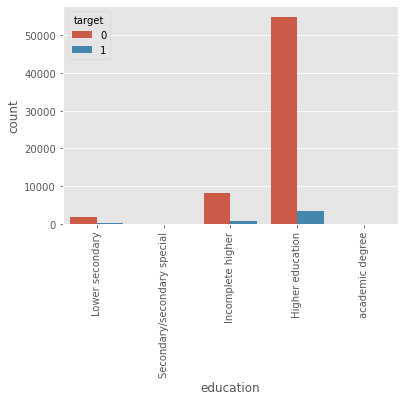

In [101]:
print(target1['education'].value_counts())
ax = sns.countplot(x = 'education', hue = 'target', data = app,\
                  order = ['Lower secondary','Secondary/secondary special','Incomplete higher',
                          'Higher education','academic degree'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

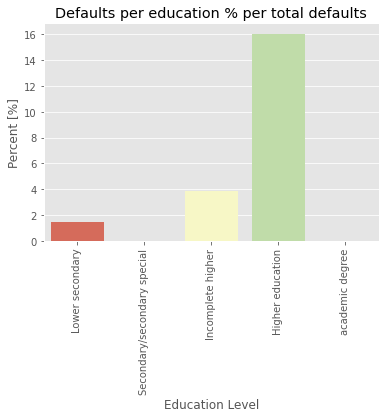

In [103]:
# Percentage of defaults (defaults per credit amount compared to total defaults)
targ1_in = target1['education'].value_counts()
targ1_total = target1.shape[0]
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Education Level', ylabel ='Percent [%]', title = 'Defaults per education % per total defaults')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

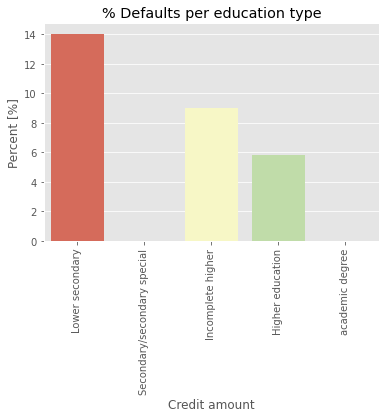

In [110]:
# Percentage of defaults per credit range
targ1_in = target1['education'].value_counts()
targ1_total = app['education'].value_counts()
targ1_in_perc = (targ1_in/targ1_total)*100
targ1_in_perc = targ1_in_perc.sort_values(ascending = False)

ax = sns.barplot(x = targ1_in_perc.index, y = targ1_in_perc.values,\
                 order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'],\
                 palette = 'Spectral')
ax.set(xlabel = 'Credit amount', ylabel ='Percent [%]', title = '% Defaults per education type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Combine several factors

In [109]:
targ1_age = target1['age_range'].value_counts()
age_total = app['age_range'].value_counts()
targ1_age_perc = (targ1_age/age_total)*100

print(targ1_age_perc.values[0:3].sum())
print(targ1_age_perc.values[4:7].sum())
#['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','>65']

31.28258225186773
20.739841942456025


* We know that the age group below 40 years makes up 31% of the defaults.
* And we know that men are more likely to default than women.
--> combine age and gender.

[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

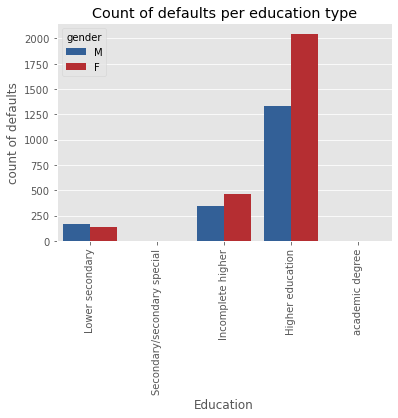

In [120]:
ax = sns.countplot(x = 'education', hue = 'gender', data = target1,\
                  order = ['Lower secondary','Secondary/secondary special','Incomplete higher',
                          'Higher education','academic degree'],
                   palette = ['#225ea8','#cb181d'])

ax.set(xlabel = 'Education', ylabel = 'count of defaults', title = 'Count of defaults per education type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Lower secondary'),
 Text(1, 0, 'Secondary/secondary special'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Higher education'),
 Text(4, 0, 'academic degree')]

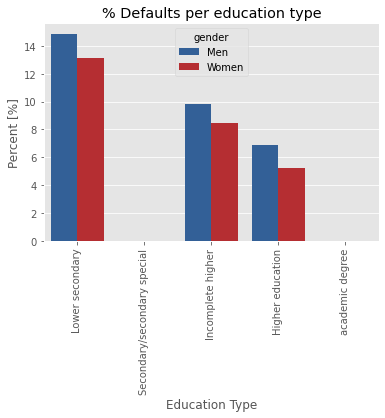

In [162]:
men_ed = men_app.groupby('education')['target'].agg('sum')
men_ed_total = men_app['education'].value_counts()
men_per = round((men_ed/men_ed_total)*100,2)


men_per = men_per.reset_index()
men_per.columns = ['Education','Percent']
men_per['gender'] = 'Men'


women_ed = women_app.groupby('education')['target'].agg('sum')
women_ed_total = women_app['education'].value_counts()
women_per = round((women_ed/women_ed_total)*100,2)

women_per = women_per.reset_index()
women_per.columns = ['Education','Percent']
women_per['gender'] = 'Women'

df = men_per.append(women_per)
df


ax = sns.barplot(x = 'Education', y = 'Percent', hue = 'gender', data = df,\
                order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'],\
                 palette = palette_gender)
ax.set(xlabel = 'Education Type', ylabel ='Percent [%]', title = '% Defaults per education type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


So both, men AND women are more likely to default if their education is Lower Secondary. 

* We also know that age groups below 40 are more likely to default. 
    --> Put age together with gender, to see if that is true for both genders. 

[Text(0, 0, '<25'),
 Text(1, 0, '25-30'),
 Text(2, 0, '30-35'),
 Text(3, 0, '35-40'),
 Text(4, 0, '40-45'),
 Text(5, 0, '45-50'),
 Text(6, 0, '50-55'),
 Text(7, 0, '55-60'),
 Text(8, 0, '60-65'),
 Text(9, 0, '>65')]

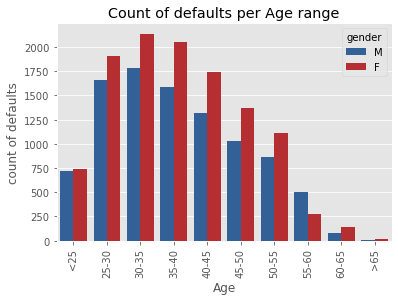

In [163]:
ax = sns.countplot(x = 'age_range', hue = 'gender', data = target1,\
                  order = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','>65'],\
                 palette = palette_gender)


ax.set(xlabel = 'Age', ylabel = 'count of defaults', title = 'Count of defaults per Age range')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '<25'),
 Text(1, 0, '25-30'),
 Text(2, 0, '30-35'),
 Text(3, 0, '35-40'),
 Text(4, 0, '40-45'),
 Text(5, 0, '45-50'),
 Text(6, 0, '50-55'),
 Text(7, 0, '55-60'),
 Text(8, 0, '60-65'),
 Text(9, 0, '>65')]

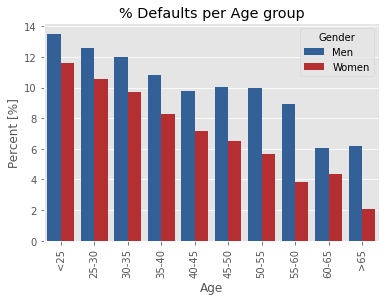

In [167]:
men_age = men_app.groupby('age_range')['target'].agg('sum')
men_age_total = men_app['age_range'].value_counts()
men_per = round((men_age/men_age_total)*100,2)


men_per = men_per.reset_index()
men_per.columns = ['Age','Percent']
men_per['Gender'] = 'Men'


women_age = women_app.groupby('age_range')['target'].agg('sum')
women_age_total = women_app['age_range'].value_counts()
women_per = round((women_age/women_age_total)*100,2)

women_per = women_per.reset_index()
women_per.columns = ['Age','Percent']
women_per['Gender'] = 'Women'

df = men_per.append(women_per)
df


ax = sns.barplot(x = 'Age', y = 'Percent', hue = 'Gender', data = df,\
                order = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','>65'],\
                 palette = palette_gender)
ax.set(xlabel = 'Age', ylabel ='Percent [%]', title = '% Defaults per Age group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Relationship between age, Education, gender?

<AxesSubplot:xlabel='education', ylabel='credit'>

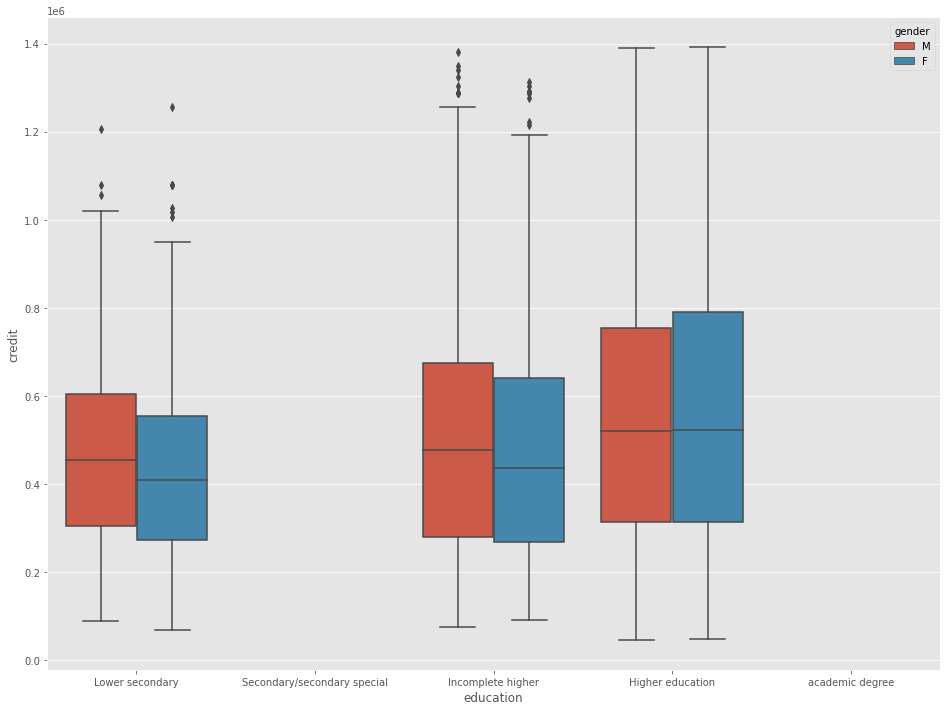

In [198]:
plt.figure(figsize = (16,12))

sns.boxplot(data = target1, x = 'education', y = 'credit', hue = 'gender',\
           order = ['Lower secondary','Secondary/secondary special',\
                          'Incomplete higher','Higher education','academic degree'])